# Proyecto Machine Learning for Business || Beta Bank
---
*Fecha de Creación: Mar-2023*

- **Senior Data Scientist:** Francisco Alfaro
- **Instructor:** Alfonso Tobar
- **Code Reviwer:** Iván Hernández
- **Notebook by:** Julio César Martínez.

# Tabla de Contenido
---

1. Introducción.
2. Licencia.
3. Librerías Requeridas.
4. Problemática.
5. Respuesta de la Problemática.
6. Etapa: Preparación de los Datos.
7. Etapa: Examinar Equilibrio de Clases.
8. Etapa: Mejorar Calidad del Modelo.
9. Etaoa: Prueba Final.
10. Conclusiones.
11. Bibliografía.
12. Agradecimientos.


## Introducción.
---

Al momento de realizar este proyecto, en internet se realizan alrededor de 5 billones de busquedas, 65 mil millones de mensajes son enviados en whatssapp, se crean 4 petabytes de data en facebook y se envían 294 mil millones de correos electrónicos. Todo esto en un solo día.

Para 2025 se estima la creación de 463 exabytes de información diaria a nivel mundial, lo equivalente a casi 213 millones de DVD por día.

La ciencia de datos es una especialidad que combina estadísticas, matemáticas, programación especializada, análsis especializado, inteligencia artificial y aprendizaje automático con el objetivo de descubrir información procesable oculta en los datos de una organización. Estos conocimientos se pueden usar para guiar la toma de decisiones y la planificación estratégica.

En este notebook trabajaré con una problemática de una organización financiera a la cual daremos solución utilizando procesos de ciencia de datos como es el machine learning y el aprendizaje supervisado para llegar a respuestas automatizadas.

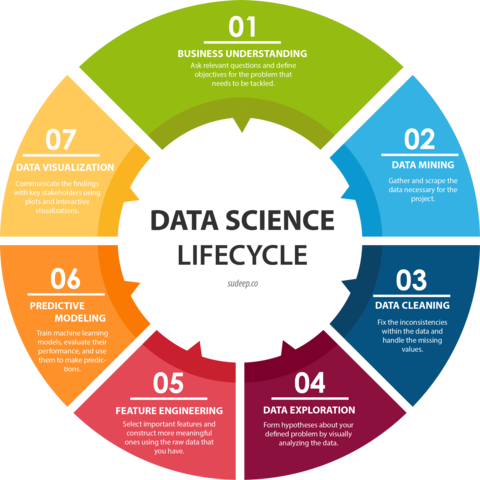

## Licencia.
---

Este notebook fue creado para la practica profesional de habilidades en ciencia de adtos y es propiedad de su creador. Queda prohibida su venta, copia, distribución, modificación y/o cualquier uso indevido e ilegial de este así como la base de datos (dataset) propiedad de beta bank. Si existe alguna duda o aclaración con respecto a este ejercicio puedes ponerte en contacto con el creador para dar solución.

## Librerías Requeridas.

---

Para este proyecto en este nootebook utilizamos diferentes librerías de python como son:

- Pandas.
- NumPy.
- Scikit-Learn.
- Matplotlib.
- Seaborn.

## Problemática.
---
Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos. Necesitamos predecir si un cliente dejará el banco pronto. Tenemos los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

![img1](https://s.yimg.com/ny/api/res/1.2/x2QHw_XWJiCl3K5_qPErrA--/YXBwaWQ9aGlnaGxhbmRlcjt3PTY0MDtoPTE2NQ--/https://media.zenfs.com/en/prnewswire.com/d3f637f211a3607f44826db0e332dbb1)

## Respondiendo a la Problemática.

---

Debemos predecir si un cliente dejará el banco o no. Bajo este argumento voy a preparar el set de datos para crear y entrenar un modelo de clasificación que nos ayude a determinar lo que ocurrirá con cada cliente. Para ello voy a experimentar con los resultados que nos arrojen algunos modelos y seleccionaré el que me parezca más correcto para esta tarea.

Una vez seleccionado el modelo vamos a intentar mejorar su calidad y realizaré pruebas finales. Debemos crear un modelo con el máximo valor F1 posible, al menos 0.59. Además, debemos medir la métrica AUC-ROC y compararla con el valor F1.

Se elige la clasificación puesto que nuestro problema es de tipo binario.

## Etapa: Preparación de los Datos.
---

Importar librerías.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score, precision_recall_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import shuffle

Importar set de datos.

In [2]:
betabank = pd.read_csv('/datasets/Churn.csv')

### Exploración de Datos.

Número de filas y columnas.

In [3]:
betabank.shape

(10000, 14)

Tipo de datos.

In [4]:
betabank.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Primeras 5 filas del dataset.

In [5]:
betabank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Información general.

In [6]:
betabank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Observaciones**

> Existen valores ausentes en la columna de Tenure. No podemos tener valores ausentes al momento de entrenar nuestro modelo por lo tanto debemos arreglarlo a nuestra manera, para ello usaremos la mediana que nos servirá para rellenar estos valores. Hasta el momento desconozco si existe otra técnica para tratar valores ausentes para machine learning y prevenir el data leakage.

### Valores Ausentes.

Cantidad de valores ausentes.

In [7]:
betabank['Tenure'].isna().sum()

909

Calculamos su distribución.

In [8]:
print('La tasa de distribución de valores ausentes es:', (betabank['Tenure'].isna().sum() / betabank.shape[0])*100)

La tasa de distribución de valores ausentes es: 9.09


Rellenamos con la mediana dado que es más robusta que la media/promedio.

In [9]:
betabank['Tenure'] = betabank['Tenure'].fillna(betabank['Tenure'].median())

Comprobamos valores ausentes.

In [10]:
betabank['Tenure'].isna().sum()

0

> Ahora nuestros datos están listos para su entrenamiento.

## Etapa: Examinar Equilibro de Clases.
---

### Descripción de los Datos

**Características**

- `RowNumber:` índice de cadena de datos
- `CustomerId:` identificador de cliente único
- `Surname:` apellido
- `CreditScore:` valor de crédito
- `Geography:` país de residencia
- `Gender:` sexo
- `Age:` edad
- `Tenure:` período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- `Balance:` saldo de la cuenta
- `NumOfProducts:` número de productos bancarios utilizados por el cliente
- `HasCrCard:` el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- `IsActiveMember:` actividad del cliente (1 - sí; 0 - no)
- `EstimatedSalary:` salario estimado

**Objetivo**
- `Exited:` El cliente se ha ido (1 - sí; 0 - no)

Para esta sección vamos a entrenar nuestro modelo sin tener en cuenta el desequilibrio.

### Segmentación de Datos.

Vamos a dividir nuestro dataset de la siguiente manera:

- Dataset de entrenamiento: 75%
- Dataset de validación: 25%

Antes de proceder al split debemos escoger el modelo con el cuál vamos a trabajar, en mi caso será la Regresión Logística debido a que debemos realizar una clasificación binaria, es decir, debemos saber si el cliente se va a ir o no.

Primero debemos codificar nuestros datos. La regresión logística utiliza una formula que consta de características numéricas. Nuestros datos contienen características categóricas.

***Codificación One-Hot***

Vamos a codificar, veamos nuestro set.

In [11]:
betabank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Tenemos variables categóricas, veamos su cardinalidad para ver si nos funcionan.

In [12]:
betabank['Surname'].value_counts()

Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
            ..
Hingston     1
Wells        1
Cummins      1
Yegorov      1
Demidov      1
Name: Surname, Length: 2932, dtype: int64

In [13]:
betabank['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
betabank['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Hay algunas variables que nuestro modelo no necesita tomar en cuenta como por ejemplo: El apellido, Número de Fila y el ID del cliente. Vamos a filtrar nuestro set y a crear uno nuevo donde quitaremos estas características.

In [15]:
bank_filter = betabank.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1)

Comprobamos cambios.

In [16]:
bank_filter.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Ahora codificamos la característica restante que es Gender.

In [17]:
betabank_ohe = pd.get_dummies(bank_filter, drop_first=True)
betabank_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Segmentación de Datos.

In [18]:
target   = betabank_ohe['Exited']               ## Selección de Objetivo.
features = betabank_ohe.drop('Exited', axis=1)  ## Selección de Características.

## Split de Datos 80/20
X_train, X_valid, y_train, y_valid = train_test_split(
    features,
    target,
    test_size = 0.20,
    random_state = 42
)

print('Set de entrenamiento:', X_train.shape, y_train.shape)
print('Set de datos de prueba:', X_valid.shape, y_valid.shape)

Set de entrenamiento: (8000, 11) (8000,)
Set de datos de prueba: (2000, 11) (2000,)


Comprobamos que el split funciona.

In [19]:
print('Set de datos fuente:', betabank.shape[0])
print('Total de splits:' , X_train.shape[0] + X_valid.shape[0])

Set de datos fuente: 10000
Total de splits: 10000


**Estandarización de Datos**

En el paso anterior no tocamos ningún parámetro de nuestro modelo. Ahora vamos a realizar un ajuste estandarizando nuestros datos. Este será nuestro primer enfoque y harémos que nuestras variables numéricas sean igual de importantes para nuestro modelo.

In [20]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(X_train[numeric])

X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])

/tmp/ipykernel_371/1064100150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric] = scaler.transform(X_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_371/1064100150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Comprobamos Estandarización.

In [21]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,0.356500,-0.655786,6.0,-1.218471,2,1,1,1.367670,0,0,1
1561,-0.203898,0.294938,4.0,0.696838,2,1,1,1.661254,1,0,1
1670,-0.961472,-1.416365,3.0,0.618629,1,1,0,-0.252807,0,1,1
6087,-0.940717,-1.131148,9.0,0.953212,1,1,0,0.915393,0,0,0
6669,-1.397337,1.625953,9.0,1.057449,1,0,0,-1.059600,0,0,1


In [22]:
X_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,-0.577496,-0.655786,3.0,0.329937,2,0,0,-1.019605,1,0,1
4684,-0.297297,0.390011,1.0,-1.218471,2,1,1,0.798883,0,0,1
1731,-0.525607,0.485083,4.0,-1.218471,2,1,0,-0.727980,0,1,0
4742,-1.511492,1.911170,8.0,0.689272,2,1,1,1.221387,1,0,1
4521,-0.951094,-1.131148,7.0,0.782839,1,1,1,0.247560,0,1,0


### Entrenar Modelo.

En esta sección voy a entrenar nuestro modelo sin tomar en cuenta el desequilibro de clases.

***Regresión Logística***

Entrenar Modelo.

In [23]:
lo_model = LogisticRegression(random_state=42, solver='liblinear')
lo_model.fit(X_train, y_train)

## Obtener Predicciones.
y_predict_tr = lo_model.predict(X_train)
y_predict = lo_model.predict(X_valid)

Evaluar la puntuación.

In [24]:
pc_score = precision_score(y_valid, y_predict) ## Obtenemos Presicion.
rc_score = recall_score(y_valid, y_predict)    ## Obtener Recall.
f1_sc    = f1_score(y_valid, y_predict)        ## Obtenemos F1 Score.
ac_score = accuracy_score(y_valid, y_predict)  ## Exactitud

In [25]:
print('Puntuación')
print('----------')
print('Presición:', pc_score)
print('Recall:'   , rc_score)
print('F1 Score:' , f1_sc)
print('Exactitud:', ac_score)

Puntuación
----------
Presición: 0.5531914893617021
Recall: 0.1984732824427481
F1 Score: 0.29213483146067415
Exactitud: 0.811


La media armónica entre precision y recall es de solo 0.29(F1). Parece que el modelo de regresión no es tan bueno para esta tarea sin modificar algún parámetro aunque su exactitud parece ser buena.

## Etapa: Mejorar Calidad del Modelo.
---

En el ejercicio anterior realizamos entrenamientos y pruebas sin modificar algún parámetro. Para este caso voy a trabajar con el modelo de regresión logística ya que su velocidad de ejecución es la más rápida y haciendo los ajustes necesarios podríamos obtener un buen resultado en F1.

### Prueba de Consistencia

Hagamos una prueba sobre el equilibrio de las clases de nuestro modelo.

In [26]:
class_frequency = target.value_counts(normalize=True)
class_frequency

0    0.7963
1    0.2037
Name: Exited, dtype: float64

<AxesSubplot:>

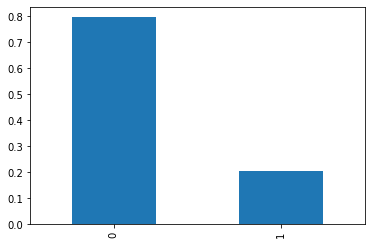

In [27]:
class_frequency.plot(kind='bar')

Las estadísticas no mienten, el 20% de los clientes se han marchado.

Hagamos un modelo constante.

In [28]:
target_pred_constant = pd.Series(0, index=target.index)

print('Exactitud del Modelo Constante:', accuracy_score(target, target_pred_constant))
print('Exactitud del Modelo de Regresión:', ac_score)

Exactitud del Modelo Constante: 0.7963
Exactitud del Modelo de Regresión: 0.811


La exactitud de nuestro modelo de regresión es la misma que la del modelo constante lo que quiere decir que nuestro modelo está equilibrado. Vamos a ver lo que ocurre con las clases.

### Equilibrio y Desequilibrio de Clases.

***Matriz de Confusión.***

Una vez se ha entrenado un modelo, podemos obtener predicciones sobre el conjunto de datos. En el caso de un problema binario, nuestro modelo clasificaría como 0 o 1 un conjunto de datos, y a partir de esto podemos ya crear la matriz de confusión.

En esta tabla, los números de la primera columna, representan los valores predichos, mientras que los valores de la primera fila, representan los valores reales.

- TP (True Positive) – Son los valores que el algoritmo clasifica como positivos y que realmente son positivos.
- TN (True Negative) – Son valores que el algoritmo clasifica como negativos (0 en este caso) y que realmente son negativos.
- FP (False Positive) – Falsos positivos, es decir, valores que el algoritmo clasifica como positivo cuando realmente son negativos.
- FN (False Negative) – Falsos negativos, es decir, valores que el algoritmo clasifica como negativo cuando realmente son positivos.

Hagamos una función para visualizar la matriz.

In [29]:
def metricas(clase_real, clase_predicha):
    """Calcular matriz usando sklearn"""
    matriz    = confusion_matrix(clase_real, clase_predicha)
    accuracy  = accuracy_score(clase_real, clase_predicha)
    precision = precision_score(clase_real, clase_predicha)
    recall    = recall_score(clase_real, clase_predicha)
    f1        = f1_score(clase_real, clase_predicha)
    return matriz, accuracy, precision, recall, f1

def visualiza_metricas(clase_real, clase_predicha, titulo):
    """Visualiza la matriz de confusión y métricas"""
    
    ## Código para calcular las métricas y matriz de confusión.
    
    matriz, accuracy, precision, recall, f1 = metricas(clase_real, clase_predicha)
    
    ## Código de matplotlib para graficar.
    plt. figure(figsize=(4,4))
    matriz = pd.DataFrame(matriz, columns=["0: Se queda", "1: Se va"])
    plt.matshow(matriz, cmap="gray", vmin=1, vmax=10, fignum=1)
    plt.title("Predichas")
    plt.ylabel("Reales")
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                ("Falsos\nnegativos", "Verdaderos\npositivos"))
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]), 
                     fontsize=30, ha='center', va='center')
            plt.text(i, j - 0.25, etiquetas[i][j], 
                     fontsize=11.5, ha='center', va='center')
    plt.text(1.60, -0.30, titulo, fontsize=25, c='Red')
    plt.text(2.1, 0.10, "Accuracy: %0.2f"% accuracy, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f"% precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f"% recall, fontsize=20)
    plt.text(2.1, 1.00, "F1: %0.2f"% f1, fontsize=20)
    plt.show()

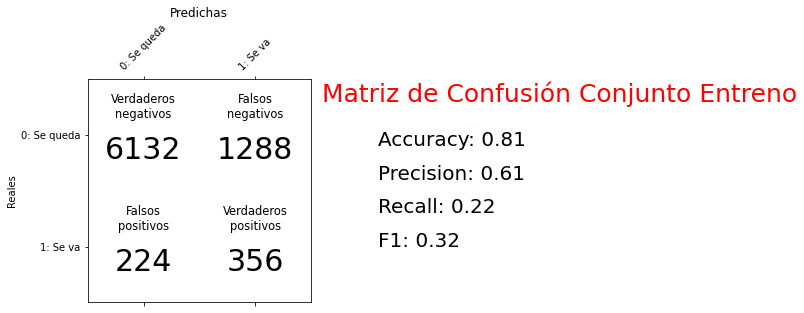

In [30]:
visualiza_metricas(y_train, y_predict_tr, "Matriz de Confusión Conjunto Entreno")

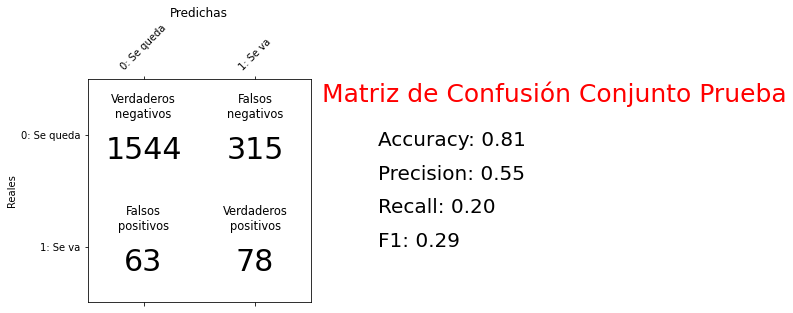

In [31]:
visualiza_metricas(y_valid, y_predict, "Matriz de Confusión Conjunto Prueba")

**Ajuste de Peso**

Ahora vamos a realizar un ajuste en el peso, esto es porque nuestro modelo está prediciendo más casos negativos que positivos, debemos equilibrarlo porque lo que buscamos predecir es la clase número 1 es decir aquellos clientes de betabank que busquen su salida del banco.

De esta forma lograremos disminuir los objetivos que son FN, un FN para el banco representa un riesgo ya que si nuestro modelo predice que el cliente no se va pero en realidad si se va eso le costaría dinero, eso es lo que menos quisiera en estos momentos betabank.

In [32]:
## Volvemos a entrenar a nuestro modelo de regresión.
regression_model_1 = LogisticRegression(random_state=42, solver='liblinear', class_weight={0:1, 1:3})
regression_model_1.fit(X_train, y_train)

## Obtenemos las Predicciones.
y_predict_1_tr = regression_model_1.predict(X_train)
y_predict_1 = regression_model_1.predict(X_valid)

print('Entrenamiento Completado')
print('Predicciones Completadas')

Entrenamiento Completado
Predicciones Completadas


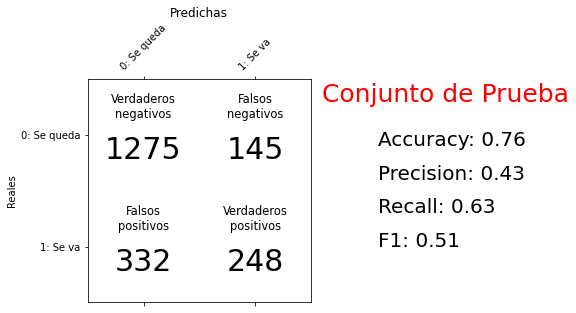

In [33]:
visualiza_metricas(y_valid, y_predict_1, "Conjunto de Prueba")

*Evaluación de Métricas*

Eh aquí la potencia de sklearn y sus parámetros, con solo unos movimientos elevamos nuestro score de F1 de 0.29 a 0.51, aunque ya es bastante bueno aún nos falta un poco para elevarlo al límite de 0.59 que establece betabank.

**Submuestreo**

Probemos ahora qué ocurriría si realizamos un submuestreo.

In [34]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    X_train, y_train, 0.9
)

regression_model_2 = LogisticRegression(random_state=42, solver='liblinear', class_weight={0:1, 1:3})
regression_model_2.fit(features_downsampled, target_downsampled)

y_predict_2 = regression_model_2.predict(X_valid)
print('Modelo 2 Entrenado...!')

Modelo 2 Entrenado...!


Evaluación de Métricas.

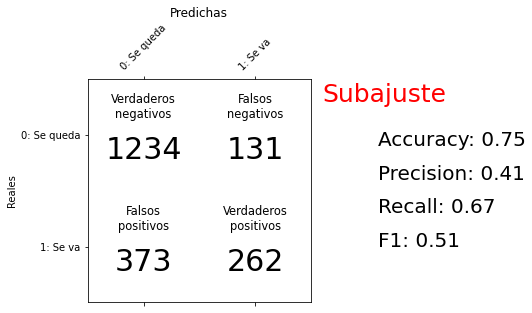

In [35]:
visualiza_metricas(y_valid, y_predict_2, 'Subajuste')

Conseguimos aumentar un poco el F1 al colocar nuestra fracción en 0.9

**Sobremuestreo**

Probemos ahora con el submuestreo.

In [36]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=42
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    X_train, y_train, 3
)

regression_model_3 = LogisticRegression(random_state=42, solver='liblinear', class_weight={0:1, 1:2})
regression_model_3.fit(features_upsampled, target_upsampled)

y_predict_3 = regression_model_3.predict(X_valid)

print('Modelo 3 Entrenado')

Modelo 3 Entrenado


Evaluación de Métricas.

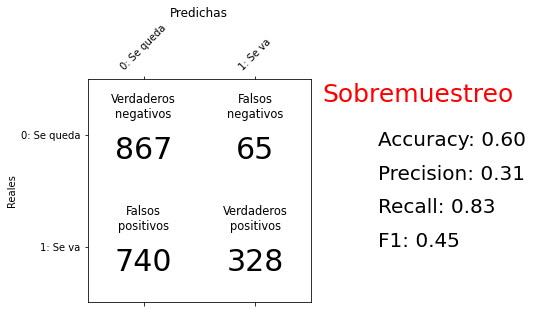

In [37]:
visualiza_metricas(y_valid, y_predict_3, 'Sobremuestreo')

Hemos hecho los ajustes necesarios pero vemos que el valor de f1 en ninguno de los casos supera los 50 puntos, esto nos indica que quizás no sea el mejor modelo a evaluar. Vamos a intentar con otro modelo a ver si logramos superar estas métricas.

### Árbol de Decisión.

Codificación Ordinal

In [38]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(betabank), columns=betabank.columns)

Split de Datos.

In [39]:
target_a   = data_ordinal['Exited']
features_a = data_ordinal.drop('Exited', axis=1)

X_train_a, X_valid_a, y_train_a, y_valid_a = train_test_split(
    features_a, 
    target_a, 
    test_size=0.25, 
    random_state=42
)

print('Set de entrenamiento:', X_train_a.shape, y_train_a.shape)
print('Set de datos de prueba:', X_valid_a.shape, y_valid_a.shape)

Set de entrenamiento: (7500, 13) (7500,)
Set de datos de prueba: (2500, 13) (2500,)


Entrenamiento

In [40]:
ad_model = DecisionTreeClassifier(random_state=42)
ad_model.fit(X_train_a, y_train_a)

print('El modelo se entreno correctamente!')

El modelo se entreno correctamente!


Predicciones.

In [41]:
y_prediction_a = ad_model.predict(X_valid_a)

Evaluación de Métricas.

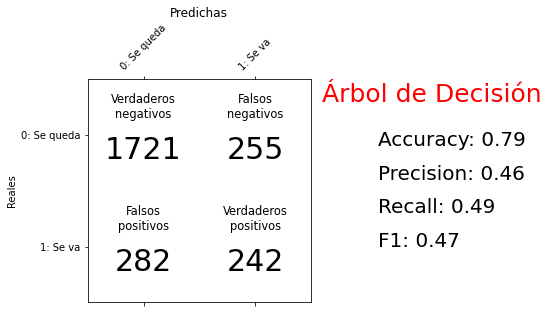

In [42]:
visualiza_metricas(y_valid_a, y_prediction_a, 'Árbol de Decisión')

Encontrar la Mejor Calidad.

In [43]:
best_model = None
best_result = 0
for depth in range(1, 100):
    ad_model = DecisionTreeClassifier(random_state=42, max_depth = depth)
    ad_model.fit(X_train_a, y_train_a)             # entrena el modelo 
    predictions = ad_model.predict(X_valid_a)      # obtén las predicciones del modelo
    result = f1_score(y_valid_a, predictions)      # calcula el f1
    if result > best_result:
        best_model  = ad_model
        best_result = result
        
print("F1 del mejor modelo en el conjunto de validacion:", best_result)
print("El mejor modelo es:", best_model)

F1 del mejor modelo en el conjunto de validacion: 0.560553633217993
El mejor modelo es: DecisionTreeClassifier(max_depth=9, random_state=42)


Entrenamos el Mejor Modelo.

In [44]:
ad_model = DecisionTreeClassifier(random_state=42, max_depth=9)
ad_model.fit(X_train_a, y_train_a)

y_prediction_a = ad_model.predict(X_valid_a)

print('El modelo se entreno correctamente!')

El modelo se entreno correctamente!


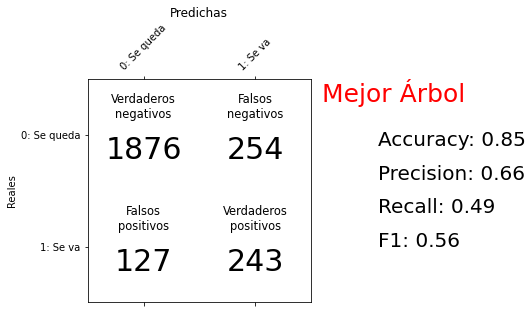

In [45]:
visualiza_metricas(y_valid_a, y_prediction_a, 'Mejor Árbol')

Nuestro mejor modelo para F1 se acerca demasiado pero no llega al objetivo. Quizás la mejor opción sea el último modelo que nos queda explorar.

### Bosque Aleatorio

Para nuestro bosque ya tenemos la codificación del árbol de decisión, podemos utilizarla para pasar directamente al entrenamiento de nuestro bosque.

In [46]:
## Entrenamos Modelo.
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_a, y_train_a)

## Obtenemos Predicciones.
y_prediction_b = rf_model.predict(X_valid_a)

print('Modelo Entrenado!')
print('Predicciones Obtenidas!')

Modelo Entrenado!
Predicciones Obtenidas!


Evaluación de Métricas

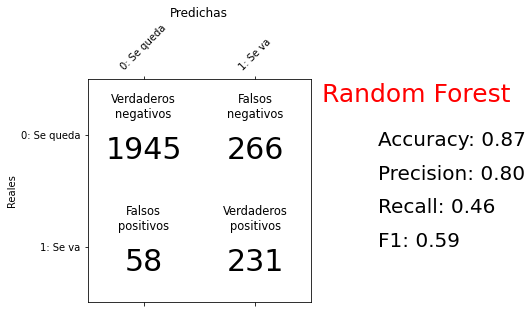

In [47]:
visualiza_metricas(y_valid_a, y_prediction_b, 'Random Forest')

Increíble... el bosque aleatorio por si solo logra la puntuación mínima de 0.59 para el conjunto de prueba. Vamos si encontrando el mejor modelo aumentando la profundidad podemos aumentar un poco más el F1.

## Etapa: Prueba Final.

Encontremos el mejor modelo que nos puede proporcionar el mejor F1 Score.

In [48]:
best_model = None
best_result = 0
for est in range(1, 100):
    rf_model = RandomForestClassifier(random_state=42, n_estimators=est)
    rf_model.fit(X_train_a, y_train_a)               # entrena el modelo 
    predictions_a = rf_model.predict(X_valid_a)      # obtén las predicciones del modelo
    result = f1_score(y_valid_a, predictions_a)      # calcula el f1
    if result > best_result:
        best_model  = rf_model
        best_result = result
        
print("F1 del mejor modelo en el conjunto de validacion:", best_result)
print("El mejor modelo es:", best_model)

F1 del mejor modelo en el conjunto de validacion: 0.5872020075282308
El mejor modelo es: RandomForestClassifier(n_estimators=23, random_state=42)


Entrenamos Modelo

In [49]:
## Entrenamos Modelo.
rf_model = RandomForestClassifier(random_state=42, n_estimators=23)
rf_model.fit(X_train_a, y_train_a)

## Obtenemos Predicciones.
y_prediction_b = rf_model.predict(X_valid_a)

print('Modelo Entrenado!')
print('Predicciones Obtenidas!')

Modelo Entrenado!
Predicciones Obtenidas!


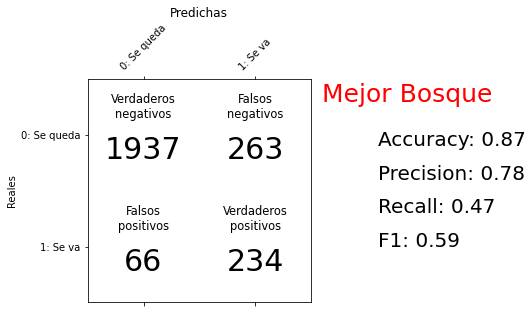

In [50]:
visualiza_metricas(y_valid_a, y_prediction_b, 'Mejor Bosque')

Definitivamente es el bosque aleatorio nuestro modelo de clasificación que más se acerca al puntaje requerido.

Veamos qué es lo que ocurre con la Curva ROC

In [51]:
## Obtenemos las probabilidades.

probabilities_valid = rf_model.predict_proba(X_valid_a)
probabilities_one_valid = probabilities_valid[:, 1]

## Obtenemos el valor de la Curva ROC
auc_roc = roc_auc_score(y_valid_a, probabilities_one_valid)
print('El puntaje de la Curva ROC es:', auc_roc)

El puntaje de la Curva ROC es: 0.8300999205417228


Visualizamos nuestra curva.

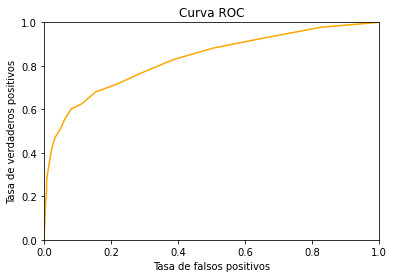

Text(0.5, 1.0, 'Curva ROC')

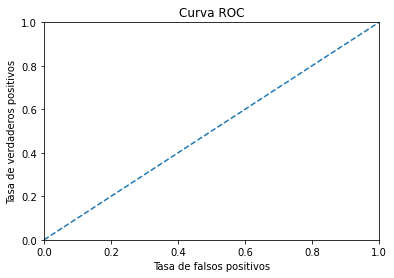

In [52]:
fpr, tpr, thresholds = roc_curve(y_valid_a, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, color='orange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show() 

# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')

## Conclusiones.
---

Después de probar diferentes técnicas y modelos llegamos a la conclusión de que gracias a las evidencias el bosque aleatorio es el mejor modelo para predecir la tarea de clasificación sobre los clientes que saldrán en los próximos meses de betabank.

Esto es porque el score de F1 el cuál muestra una media armónica entre la precisión y la sensibilidad tiene un valor por encima de 0.5 lo cual me parece es un buen índice.

Tal vez en el futuro haya más herramientas para mejorar aún más estos parámetros, pero por ahora se pusieron en práctica la mayor parte de técnicas vistas en este sprint.

Esperemos haber ayudado a betabank con su tarea.

## Bibliografía.
---

- ¿Cuántos datos se generan cada día? - Felipe Arguello (21-06-21). *https://www.infoteknico.com/cuantos-datos-se-generan-cada-dia/*
- What is data science..? - IBM(s.f.). *https://www.ibm.com/topics/data-science*
- Logotipo. Betabank *https://www.betabank.com/*
- Consultas generales. Grupo Practicum *https://www.slack.com*

## Agradecimientos.
---

A los tutores Alfonso Tobar y Francisco Alfaro que en todo momento nos acompañan en este camino de crecimiento para inspirarnos a ser mejores profesionales de la ciencia de datos.